In [1]:
import sys
import os
sys.path.insert(1, '/storage/home/nxt5197/work/530_stellar_atmospheres/lib/')
from statmospheres import Partition
from statmospheres import Kappa_Hbf_2e
from statmospheres import NIST_Phi
from statmospheres import A_sol
from statmospheres import NIST_Kappa_Total
from statmospheres import NIST_Solve_Pe
from statmospheres import Continuous_Opacity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../lib/plt_format.mplstyle')
from astropy import units as u
from astropy import constants as const
from scipy.special import wofz

### Equation (9.8) Gray
$\sigma^l_\nu = \frac{\sqrt{\pi} e^2}{m_e c^2} f_{lu} \frac{H(u,a)}{\Delta \lambda_D} \lambda_0^2 \: \text{cm}^2$ Hz <br>
$A_{ul} = 6.67 \times 10^{13} \frac{g_l}{g_u} \frac{f_{lu}}{\lambda^2} \: \text{s}^{-1}$ <br>
$a = \frac{\gamma}{4 \pi \Delta \nu_D}$ <br>
$u = \frac{\nu - \nu_0}{\Delta \nu_D}$ <br>
$\Delta \nu_D = \frac{\nu_0}{c} \sqrt{\frac{2 k T}{m}+\xi^2_\text{micro}}$ <br>
$\Delta \lambda_D = \frac{\lambda_0}{c} \sqrt{\frac{2 k T}{m}+\xi^2_\text{micro}}$ <br>

In [2]:
os.chdir('/storage/home/nxt5197/work/530_stellar_atmospheres/lib')

In [3]:
Partition_table=pd.read_csv('RepairedPartitionFunctions.txt',delimiter=r"\s+", header=None)
PTable=Partition_table.rename(columns={0: 'Element', 1: 0.2,2: 0.4,3: 0.6,4: 0.8,5: 1.0,6: 1.2,7: 1.4,8: 1.6,9: 1.8,10: 2.0,11: 'log g0'})
PTable


,Element,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,log g0
0,H,0.368,0.303,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301
1,He,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,He+,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301
3,Li,-,0.987,0.488,0.359,0.320,0.308,0.304,0.302,0.302,0.302,0.301
4,Be,-,0.328,0.087,0.025,0.007,0.002,0.001,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Pa+,2.985,2.413,2.169,1.990,1.846,1.723,1.615,1.515,1.419,1.323,1.519
243,Pa++,-,2.106,1.845,1.652,1.469,1.281,1.088,0.895,0.708,0.532,-
244,U,3.221,2.696,2.298,2.032,1.849,1.719,1.623,1.552,1.498,1.455,1.929
245,U+,2.694,2.031,1.719,1.553,1.455,1.392,1.349,1.317,1.292,1.270,1.716


In [4]:
T = 5776*u.K
element = 'Li'

Partition(PTable,element,T)

2.2123184714236346

In [5]:
NistIonizTable = pd.read_csv('nist_ioniz.txt',delimiter='\t',header=None)
NistIonizTable=NistIonizTable.rename(columns={0: 'Atomic_Number', 1: 'Element',2: 'Atomic_Weight',3: 'Ionization_Energy'})
NistIonizTable['Element'] = NistIonizTable['Element'].str.strip()
# IonizTable = pd.read_fwf('ioniz.txt',header=None)
# IonizTable=IonizTable.rename(columns={0: 'Atomic_Number', 1: 'Element',2: 'Atomic_Weight',3: 'Ionization_Energy_1',4: 'Ionization_Energy_2',5: 'Ionization_Energy_3'})
NistIonizTable[NistIonizTable['Element']=='H']

,Atomic_Number,Element,Atomic_Weight,Ionization_Energy
0,1,H,1.008,13.598434


In [6]:
df=NistIonizTable
element='H'
row = df[df.Element==element]
X = row['Ionization_Energy'].item()*u.eV
X

<Quantity 13.59843401 eV>

In [7]:
element='Ba'
T = 7715*u.K
NIST_Phi(NistIonizTable,PTable,element,T)

<Quantity 833555.13949913>

In [8]:
ATable = pd.read_csv('SolarAbundance.txt',delimiter='\t',header=0)
df=ATable
element='Li'
df[df.element==element]

def Aj(j):
    return A_sol(ATable,j).A.item()

Aj('Li')

1.26e-11

In [9]:
# element='Eu'
# theta = 5040*u.K/T
# row = df[df.Element==element]
# thetas = list(df)[1:-1]
# U_strs = [val for val in list(row.reset_index(drop=True).iloc[0][1:-1])]
# nulls = []
# for i,U in enumerate(U_strs):
#     if U == '-':
#         nulls.append(i)
# for i in reversed(nulls):
#     del thetas[i]
#     del U_strs[i]
# Us = [float(u) for u in U_strs]
# U_r = np.interp(theta,thetas,Us)
# U_r

In [10]:
# list(PTable.Element[1:])

In [11]:
T = 5733*u.K
elements=list(ATable[ATable.A>0].element)
for element in elements:
    if element not in list(PTable.Element):
        elements.remove(element)
    if element not in list(NistIonizTable.Element):
        elements.remove(element)
    if element!= 'H' and element+'+' not in list(PTable.Element[1:]):
        elements.remove(element)
# elements.insert(0, 'H')
print(elements)
# Pg = 10**4.95
# Pef = NIST_Solve_Pe(Pg,elements,ATable,NistIonizTable,PTable,T)
# print(np.log10(Pef))

['H', 'He', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'W', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Th', 'U']


In [12]:
# Ts = [4310,4325,4345,4370,4405,4445,4488,4524,4561,4608,4660,4720,4800,4878,4995,5132,5294,5490,5733,6043,6429,6904,7467,7962,8358,8630,8811]
# Pgs = [2.87,3.03,3.17,3.29,3.41,3.52,3.64,3.75,3.86,3.97,4.08,4.19,4.30,4.41,4.52,4.63,4.74,4.85,4.95,5.03,5.10,5.15,5.18,5.21,5.23,5.26,5.29]
# Pes = [-1.16,-1.02,-0.89,-0.78,-0.66,-0.55,-0.44,-0.33,-0.23,-0.12,-0.01,0.10,0.22,0.34,0.47,0.61,0.76,0.93,1.15,1.43,1.78,2.18,2.59,2.92,3.16,3.32,3.42]
# data = {'Temp': Ts, 'log_Pg': Pgs, 'log_Pe': Pes}
# Table_9o2 = pd.DataFrame(data)
# # Table_9o2

In [13]:
# talbelen=len(Ts)
# calc_Pe = [np.log10(NIST_Solve_Pe(10**Table_9o2.log_Pg.iloc[i],elements,ATable,NistIonizTable,PTable,Table_9o2.Temp.iloc[i]*u.K)) for i in range(talbelen)]

In [14]:
# Table_9o2['calc_Pe'] = [round(x.value,2) for x in calc_Pe]
# Table_9o2['Pe_diff'] = [Table_9o2.calc_Pe.iloc[i] - Table_9o2.log_Pe.iloc[i] for i in range(talbelen)]
# Table_9o2

In [15]:
SumA = 0
SumAmu = 0
for i in range(30):
    SumA += ATable.A.iloc[i].item()
    SumAmu += ATable.weight.iloc[i].item()*ATable.A.iloc[i].item()
print(f'Sum of Abundances: {SumA}\nSum of Abundances times weights: {SumAmu}')

Sum of Abundances: 1.0861752053727
Sum of Abundances times weights: 1.367107621952563


In [16]:
SumA = 0
SumAmu = 0
for i in range(2,len(ATable)):
    if ATable.A.iloc[i].item() > 0:
        SumA += ATable.A.iloc[i].item()
        SumAmu += ATable.weight.iloc[i].item()*ATable.A.iloc[i].item()
print(f'Sum of Abundances: {SumA}\nSum of Abundances times weights: {SumAmu}')

Sum of Abundances: 0.0010752126721989992
Sum of Abundances times weights: 0.018453079261262224


In [17]:
ValTable = pd.read_csv('VALIIIC.txt', delim_whitespace=True, escapechar='#',skiprows=[0,1,2,3,5])
ValTable = ValTable.replace('d','e', regex=True)
ValTable[0:5]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho
0,2543,5.257e-06,0.,447000,11.28,1.005e+09,1.205e+09,1.440e-01,0.9896,2.349e-15
1,2298,5.365e-06,3.712e-08,141000,9.87,3.205e+09,3.839e+09,1.470e-01,0.9752,7.494e-15
2,2290,5.373e-06,3.969e-08,89100,9.82,5.041e+09,5.961e+09,1.472e-01,0.9614,1.179e-14
3,2280,5.389e-06,4.491e-08,50000,9.76,9.038e+09,9.993e+09,1.477e-01,0.9318,2.113e-14
4,2274,5.404e-06,4.952e-08,37000,9.73,1.201e+10,1.318e+10,1.481e-01,0.9102,2.808e-14


In [18]:
pd.set_option('display.float_format', '{:.4g}'.format)
ValTable = ValTable.apply(pd.to_numeric)
ValTable[0:5]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho
0,2543,5.257e-06,0,447000,11.28,1.005e+09,1.205e+09,0.144,0.9896,2.349e-15
1,2298,5.365e-06,3.712e-08,141000,9.87,3.205e+09,3.839e+09,0.147,0.9752,7.494e-15
2,2290,5.373e-06,3.969e-08,89100,9.82,5.041e+09,5.961e+09,0.1472,0.9614,1.179e-14
3,2280,5.389e-06,4.491e-08,50000,9.76,9.038e+09,9.993e+09,0.1477,0.9318,2.113e-14
4,2274,5.404e-06,4.952e-08,37000,9.73,1.201e+10,1.318e+10,0.1481,0.9102,2.808e-14


In [19]:
Valen = len(ValTable)
P_es = [0 for i in range(Valen)]
P_e_ideals = [0 for i in range(Valen)]
log_n_ps = [0 for i in range(Valen)]
for i in range(48,49):
    row = ValTable.iloc[i]
    Pgas = row['Ptotal']*row['Pgas/Ptotal']
    Temp = row['T']*u.K
    n_H = row['n_H']
    Phi_H = NIST_Phi(NistIonizTable, PTable, 'H', Temp)
    P_e = NIST_Solve_Pe(Pgas,elements,ATable,NistIonizTable,PTable,Temp)
    P_es[i] = P_e
    k = const.k_B.cgs
    n_e = row['n_e']
    P_e_ideal = n_e*k*Temp/u.erg
    P_e_ideals[i] = P_e_ideal
    n_p = n_H*Phi_H/P_e_ideal
    log_n_ps[i] = np.log10(n_p)
ValTable['P_e'] = P_es
ValTable['log(n_p)'] = log_n_ps
ValTable['log(n_e)'] = [np.log10(i) for i in ValTable['n_e']]

Count exceeded. While loop broken.
Pef: 56.010865870794184
Pei: 56.01066245949288
It took 50 iterations to calculate P_e


In [20]:
ValTable[47:50]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho,P_e,log(n_p),log(n_e)
47,50,3.056,0.4395,5840,1.4,9.203e+16,2.122e+13,8.274e+04,0.9748,2.152e-07,0,0,13.33
48,0,4.279,0.9953,6420,1.6,1.166e+17,6.433e+13,1.172e+05,0.9702,2.727e-07,56.010865870794184,13.676898273505962,13.81
49,-25,4.991,1.683,6910,1.7,1.261e+17,1.547e+14,1.368e+05,0.9688,2.949e-07,0,0,14.19


In [179]:
lams = [589.0,589.6]*u.nm # in nm
A_uls = [6.11e7,6.10e7]/u.s
g_us = [4,2]
g_ls = [2,2]
c = const.c.cgs
pi = np.pi
kB = const.k_B.cgs
m_e = const.m_e.cgs
m = 22.99*1.66e-24*u.g
e = 4.8032e-10*(u.cm**1.5*u.g**0.5/u.s)
gamma_rads = [4*pi*10**7.799,4*pi*10**7.798]
logC4s = [-15.17,-15.33]
sigma_lines=[0,0]
log_gamma_4 = [0,0]
log_gamma_6 = [0,0]
DelamDs = [0,0]
Stim_Em = [0,0]
for i,lam0 in enumerate(lams):
    lam = np.linspace(588.6,590,1000)*u.nm
    nu = c/lam
    nu0 = c/lam0
    T = ValTable['T'][48]*u.K
    # natural broadening
    gamma_rad = gamma_rads[i]/u.s
    # quadratic Stark
    logC4 = logC4s[i]
    P_e = ValTable['P_e'][48]
    gamma_4 = 10**(19+2/3*logC4+np.log10(P_e)-5/6*np.log10(T/u.K))/u.s
    log_gamma_4[i] = np.log10(gamma_4*u.s)
    # Van der Waals
    logC6 = -31.7
    P_g = ValTable['Ptotal'][48]*ValTable['Pgas/Ptotal'][48]
    gamma_6 = 10**(20 + 0.4*logC6 + np.log10(P_g) - 0.7*np.log10(T/u.K))/u.s
    log_gamma_6[i] = np.log10(gamma_6*u.s)
    gammas = gamma_rad + gamma_4 + gamma_6
    # microturbulence
    micro = ValTable['V'][48]*u.km/u.s
    DelvD = nu0/c*np.sqrt(2*kB*T/m+micro**2)
    a = gammas/(4*pi*DelvD)
    v = (nu-nu0)/DelvD
    Hua = np.real(wofz(v + 1j * a))
    A_ul = A_uls[i]
    g_u = g_us[i]
    g_l = g_ls[i]
    f_lu = A_ul*u.s/(6.67*10**13)*g_u/g_l*(lam/u.nm)**2
    DelamD = lam0/c*np.sqrt(2*kB*T/m+micro**2)
    DelamDs[i] = DelamD.to(u.AA)
    sigma_lines[i] = np.sqrt(pi) * e**2 / (m_e * c**2) * f_lu * Hua/DelamD*lam0**2
    theta = 5040*u.K/T
    X_lam = (1.2398*10**4/(lam0.to(u.AA))).value
    Stim_Em[i] = 1-10**(-X_lam*theta)
E0 = 0 # float(NistIonizTable[NistIonizTable['Element']=='Na']['Ionization_Energy'].item())
Ground = 10**float(PTable[PTable.Element=='Na']['log g0'].item())/Partition(PTable,'Na',T)*np.exp((-E0/kB/T).value)
Phi_Na = NIST_Phi(NistIonizTable, PTable, 'Na', T)
Phi_NaI = NIST_Phi(NistIonizTable, PTable, 'Na+', T)
Neutral = N1s_Na = 1/(1+Phi_Na/P_e+Phi_Na/P_e*Phi_NaI/P_e)
print(f'\nGround Fraction:\t{Ground:.4f}')
print(f'Neutral Fraction:\t{Neutral:.4e}')
print(f'Lines:\t\t\t{lams[0].to(u.AA).value:.0f}\t{lams[1].to(u.AA).value:.0f}')
print(f'log_10 gamma_4:\t\t{log_gamma_4[0]:.3f}\t{log_gamma_4[1]:.3f}')
print(f'log_10 gamma_6:\t\t{log_gamma_6[0]:.3f}\t{log_gamma_6[1]:.3f}')
print(f'Del lambda D:\t\t{DelamDs[0].value:.4f}\t{DelamDs[1].value:.4f}')
print(f'Stimulated Emission:\t{Stim_Em[0]:.4f}\t{Stim_Em[1]:.4f}')


Ground Fraction:	0.8587
Neutral Fraction:	6.4112e-04
Lines:			5890	5896
log_10 gamma_4:		7.462	7.355
log_10 gamma_6:		9.711	9.711
Del lambda D:		0.0527	0.0528
Stimulated Emission:	0.9777	0.9777


In [186]:
@u.quantity_input(lam=u.nm)
def sigma(lam,z,ValTable,P_e_status=None):
    lams = [589.0,589.6]*u.nm # in nm
    A_uls = [6.11e7,6.10e7]/u.s
    g_us = [4,2]
    g_ls = [2,2]
    c = const.c.cgs
    pi = np.pi
    kB = const.k_B.cgs
    m_e = const.m_e.cgs
    m = 22.99*1.66e-24*u.g
    e = 4.8032e-10*(u.cm**1.5*u.g**0.5/u.s)
    gamma_rads = [4*pi*10**7.799,4*pi*10**7.798]
    logC4s = [-15.17,-15.33]
    sigma=[0,0]
    log_gamma_4 = [0,0]
    log_gamma_6 = [0,0]
    DelamDs = [0,0]
    Stim_Em = [0,0]
    ValTable=ValTable
    for i,lam0 in enumerate(lams):
        # lam = np.linspace(588.6,590,1000)*u.nm
        nu = c/lam
        nu0 = c/lam0
        T = ValTable['T'][z]*u.K
        # natural broadening
        gamma_rad = gamma_rads[i]/u.s
        # quadratic Stark
        logC4 = logC4s[i]
        if P_e_status=='IGL':
            P_e = ValTable['P_e_IGL'][z]
        else:
            P_e = ValTable['P_e'][z]
        gamma_4 = 10**(19+2/3*logC4+np.log10(P_e)-5/6*np.log10(T/u.K))/u.s
        log_gamma_4[i] = np.log10(gamma_4*u.s)
        # Van der Waals
        logC6 = -31.7
        P_g = ValTable['Ptotal'][z]*ValTable['Pgas/Ptotal'][z]
        gamma_6 = 10**(20 + 0.4*logC6 + np.log10(P_g) - 0.7*np.log10(T/u.K))/u.s
        log_gamma_6[i] = np.log10(gamma_6*u.s)
        gammas = gamma_rad + gamma_4 + gamma_6
        # microturbulence
        micro = ValTable['V'][z]*u.km/u.s
        DelvD = nu0/c*np.sqrt(2*kB*T/m+micro**2)
        a = gammas/(4*pi*DelvD)
        v = (nu-nu0)/DelvD
        Hua = np.real(wofz(v + 1j * a))
        A_ul = A_uls[i]
        g_u = g_us[i]
        g_l = g_ls[i]
        f_lu = A_ul*u.s/(6.67*10**13)*g_u/g_l*(lam/u.nm)**2
        DelamD = lam0/c*np.sqrt(2*kB*T/m+micro**2)
        DelamDs[i] = DelamD.to(u.AA)
        sigma[i] = np.sqrt(pi) * e**2 / (m_e * c**2) * f_lu * Hua/DelamD*lam0**2
        sigma[i] = np.sqrt(pi) * e**2 / (m_e * c) * f_lu * Hua/DelvD
        # print(f'\nnp.sqrt(pi) * e**2 / (m_e * c**2) / DelamD * lam0**2: {np.sqrt(pi) * e**2 / (m_e * c**2)/DelamD*lam0**2}')
        # print(f'np.sqrt(pi) * e**2 / (m_e * c**2) / DelamD * lam0**2: {(np.sqrt(pi) * e**2 / (m_e * c**2)/DelamD*lam0**2).cgs}')
        # print(f'np.sqrt(pi) * e**2 / (m_e * c**2): {np.sqrt(pi) * e**2 / (m_e * c**2)}')
        # print(f'f_lu: {f_lu}')
        # print(f'Hua: {Hua}')
        # print(f'DelamD: {DelamD}')
        # print(f'lam0**2: {lam0**2}\n')
        theta = 5040*u.K/T
        X_lam = (1.2398*10**4/(lam0.to(u.AA))).value
        Stim_Em[i] = 1-10**(-X_lam*theta)
    return sigma[0].cgs,sigma[1].cgs

In [187]:
lams = [589.0,589.3,589.6]*u.nm # in nm
h = const.h.cgs
Kappa_D1=[0,0,0]
Kappa_D2=[0,0,0]
sigs=[[0,0],[0,0],[0,0]]
theta=5040*u.K/T
Kcont = [0,0,0]
KHbfmin = [0,0,0]
KHffmin = [0,0,0]
KHbf = [0,0,0]
KHff = [0,0,0]
Ke = [0,0,0]
for i,lam in enumerate(lams):
    nu = (c/lam).cgs
    sig1,sig2 = sigma(lam,48,ValTable)
    sigs[i] = [sig1.value,sig2.value]
    Kappa_D1[i] = sig1.value*Aj('Na')*ValTable['n_H'][48]/ValTable['rho'][48]*Ground*Neutral.value*(1-np.exp(-h*nu/kB/T).value)
    Kappa_D2[i] = sig2.value*Aj('Na')*ValTable['n_H'][48]/ValTable['rho'][48]*Ground*Neutral.value*(1-np.exp(-h*nu/kB/T).value)
    x = lam.to(u.AA).value
    X_lam = 1.2398*10**4/(x)
    P_e = ValTable['P_e'][48]
    P_g = ValTable['Ptotal'][48]*ValTable['Pgas/Ptotal'][48]
    lam=lam.to(u.AA)
    Kcont[i],KHbfmin[i],KHffmin[i],KHbf[i],KHff[i],Ke[i] = Continuous_Opacity(T,P_e,P_g,lam,elements,ATable,NistIonizTable,PTable)

In [188]:
print(f'\t\t{lams[0]}\t{lams[1]}\t{lams[2]}')
print(f'K (NaD1): \t{Kappa_D2[0]:.5f}\t\t{Kappa_D2[1]:.5f}\t\t{Kappa_D2[2]:.1f}')
print(f'K (NaD2): \t{Kappa_D1[0]:.1f}\t\t{Kappa_D1[1]:.4f}\t\t{Kappa_D1[2]:.5f}')
print(f'K (continuum): \t{Kcont[0]:.3f}\t\t{Kcont[1]:.3f}\t\t{Kcont[2]:.3f}')
print(f'K (Hbf-): \t{KHbfmin[0]:.3f}\t\t{KHbfmin[1]:.3f}\t\t{KHbfmin[2]:.3f}')
print(f'K (Hff-): \t{KHffmin[0]:.4f}\t\t{KHffmin[1]:.4f}\t\t{KHffmin[2]:.4f}')
print(f'K (Hbf): \t{KHbf[0]:.4f}\t\t{KHbf[1]:.4f}\t\t{KHbf[2]:.4f}')
print(f'K (Hff): \t{KHff[0]:.2e}\t{KHff[1]:.2e}\t{KHff[2]:.3e}')
print(f'K (e-): \t{Ke[0]:.3e}\t{Ke[1]:.3e}\t{Ke[2]:.3e}')

		589.0 nm	589.3 nm	589.6 nm
K (NaD1): 	0.00241		0.00968		476.7
K (NaD2): 	952.1		0.0194		0.00485
K (continuum): 	0.782		0.782		0.783
K (Hbf-): 	0.719		0.719		0.720
K (Hff-): 	0.0495		0.0496		0.0496
K (Hbf): 	0.0129		0.0129		0.0129
K (Hff): 	4.48e-04	4.48e-04	4.489e-04
K (e-): 	1.556e-04	1.556e-04	1.556e-04


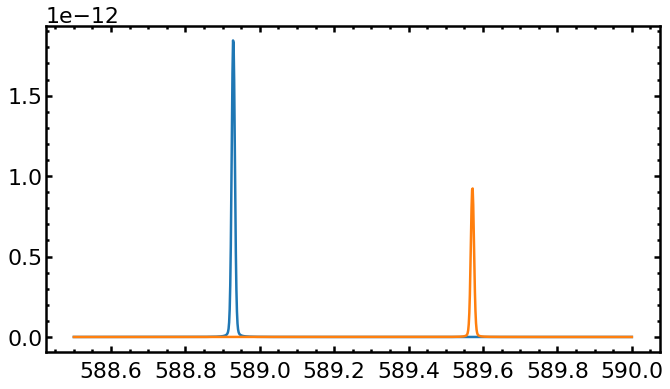

In [64]:
lams = np.linspace(588.5,590,1000)*u.nm # in nm
plt.plot(lams,sigma_lines[0].cgs)
plt.plot(lams,sigma_lines[1].cgs)
plt.show()

In [26]:
lams = np.linspace(588.5,590,1000)*u.nm # in nm
h = const.h.cgs
Kappa_D1=[0 for i in range(len(lams))]
Kappa_D2=[0 for i in range(len(lams))]
sigs = [[0,0] for i in range(len(lams))]
theta=5040*u.K/T
Kcont = [0 for i in range(len(lams))]
KHbfmin = [0 for i in range(len(lams))]
KHffmin = [0 for i in range(len(lams))]
KHbf = [0 for i in range(len(lams))]
KHff = [0 for i in range(len(lams))]
Ke = [0 for i in range(len(lams))]
for i,lam in enumerate(lams):
    nu = (c/lam).cgs
    sig1,sig2 = sigma(lam,48,ValTable)
    sigs[i] = [sig1.value,sig2.value]
    Kappa_D1[i] = sig1.value*Aj('Na')*ValTable['n_H'][48]/ValTable['rho'][48]*Ground*Neutral.value*(1-np.exp(-h*nu/kB/T).value)
    Kappa_D2[i] = sig2.value*Aj('Na')*ValTable['n_H'][48]/ValTable['rho'][48]*Ground*Neutral.value*(1-np.exp(-h*nu/kB/T).value)
    x = lam.to(u.AA).value
    X_lam = 1.2398*10**4/(x)
    P_e = ValTable['P_e'][48]
    P_g = ValTable['Ptotal'][48]*ValTable['Pgas/Ptotal'][48]
    lam=lam.to(u.AA)
    Kcont[i],KHbfmin[i],KHffmin[i],KHbf[i],KHff[i],Ke[i] = Continuous_Opacity(T,P_e,P_g,lam,elements,ATable,NistIonizTable,PTable)

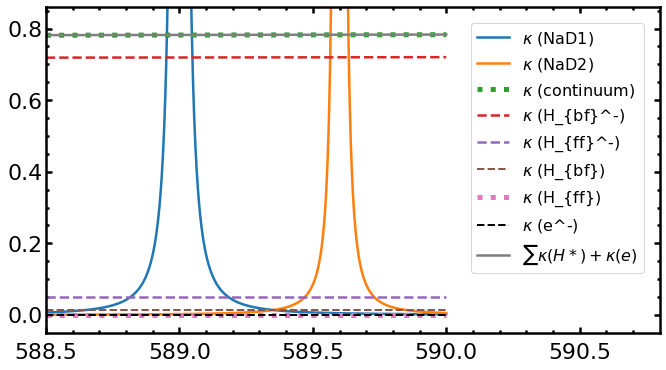

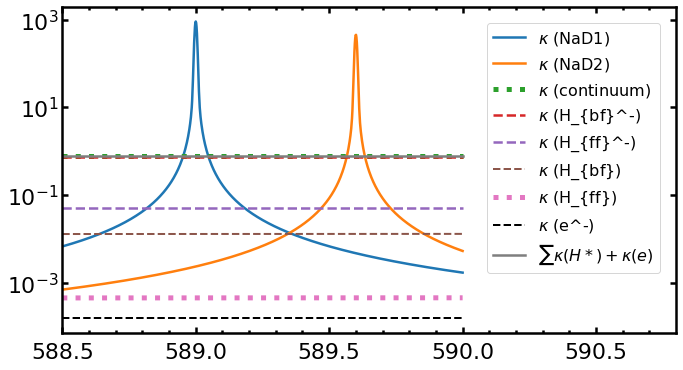

In [27]:
x = lams/u.nm
plt.plot(x,Kappa_D1,label=r'$\kappa$ (NaD1)')
plt.plot(x,Kappa_D2,label=r'$\kappa$ (NaD2)')
plt.plot(x,Kcont,linewidth=5,linestyle=':',label=r'$\kappa$ (continuum)')
plt.plot(x,KHbfmin,linestyle='--',label=r'$\kappa$ (H_{bf}^-)')
plt.plot(x,KHffmin,linestyle='--',label=r'$\kappa$ (H_{ff}^-)')
plt.plot(x,KHbf,linewidth=2,linestyle='--',label=r'$\kappa$ (H_{bf})')
plt.plot(x,KHff,linewidth=5,linestyle=':',label=r'$\kappa$ (H_{ff})')
plt.plot(x,Ke,linewidth=2,linestyle='--',color='k',label=r'$\kappa$ (e^-)')
plt.plot(x,[K1+K2+K3+K4+K5 for K1,K2,K3,K4,K5 in zip(KHbfmin,KHffmin,KHbf,KHff,Ke)],linestyle='-',label=r'$\sum \kappa (H*) + \kappa (e)$')
# plt.ylim(0,10)
plt.ylim(-0.05,1.1*max(Kcont))
plt.xlim(min(x),590.8)
plt.legend()
plt.show()
plt.plot(x,Kappa_D1,label=r'$\kappa$ (NaD1)')
plt.plot(x,Kappa_D2,label=r'$\kappa$ (NaD2)')
plt.plot(x,Kcont,linewidth=5,linestyle=':',label=r'$\kappa$ (continuum)')
plt.plot(x,KHbfmin,linestyle='--',label=r'$\kappa$ (H_{bf}^-)')
plt.plot(x,KHffmin,linestyle='--',label=r'$\kappa$ (H_{ff}^-)')
plt.plot(x,KHbf,linewidth=2,linestyle='--',label=r'$\kappa$ (H_{bf})')
plt.plot(x,KHff,linewidth=5,linestyle=':',label=r'$\kappa$ (H_{ff})')
plt.plot(x,Ke,linewidth=2,linestyle='--',color='k',label=r'$\kappa$ (e^-)')
plt.plot(x,[K1+K2+K3+K4+K5 for K1,K2,K3,K4,K5 in zip(KHbfmin,KHffmin,KHbf,KHff,Ke)],linestyle='-',label=r'$\sum \kappa (H*) + \kappa (e)$')
plt.yscale('log')
# plt.ylim(-0.05,1.1*max(Kcont))
plt.xlim(min(x),590.8)
plt.legend()
plt.show()

In [28]:
stop = stop

NameError: name 'stop' is not defined

$\mathscr{F}^+_\nu(0) = 4 \pi H(0)$

In [29]:
ValTable[47:50]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho,P_e,log(n_p),log(n_e)
47,50,3.056,0.4395,5840,1.4,9.203e+16,2.122e+13,8.274e+04,0.9748,2.152e-07,0,0,13.33
48,0,4.279,0.9953,6420,1.6,1.166e+17,6.433e+13,1.172e+05,0.9702,2.727e-07,56.010865870794184,13.676898273505962,13.81
49,-25,4.991,1.683,6910,1.7,1.261e+17,1.547e+14,1.368e+05,0.9688,2.949e-07,0,0,14.19


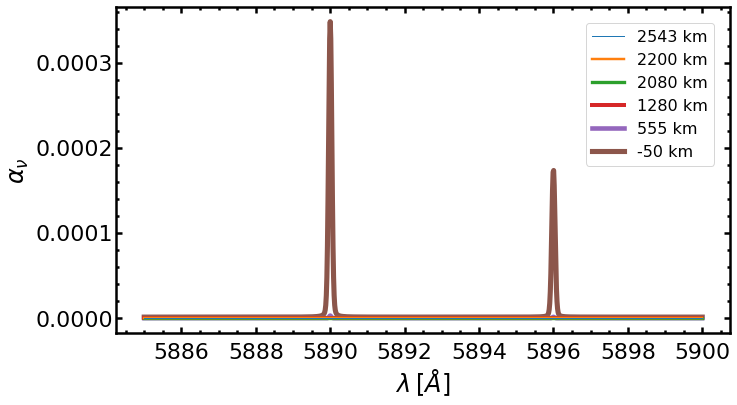

In [189]:
ValTable['P_e_IGL'] = ValTable['n_e']*kB.cgs.value*ValTable['T']

lams = np.linspace(588.5,590,1000)*u.nm # in nm
lams = np.insert(lams,0,500*u.nm,axis=0)
h = const.h.cgs
Kappa_D1=[0 for i in range(len(ValTable))]
Kappa_D2=[0 for i in range(len(ValTable))]
sigs = [[0,0] for i in range(len(ValTable))]
theta=5040*u.K/T
Kcont = [0 for i in range(len(ValTable))]
alpha_nu = [0 for i in range(len(ValTable))]
tau_nu = [0 for i in range(len(ValTable))]
for i in range(len(ValTable)):
    nu = (c/lams).cgs
    sig1,sig2 = sigma(lams,i,ValTable,P_e_status='IGL')
    sigs[i] = [sig1.value,sig2.value]
    T = ValTable['T'][i]*u.K
    Ground = 10**float(PTable[PTable.Element=='Na']['log g0'].item())/Partition(PTable,'Na',T)*np.exp((-E0/kB/T).value)
    Phi_Na = NIST_Phi(NistIonizTable, PTable, 'Na', T)
    Phi_NaI = NIST_Phi(NistIonizTable, PTable, 'Na+', T)
    P_e = ValTable['P_e_IGL'][i]
    Neutral = N1s_Na = 1/(1+Phi_Na/P_e+Phi_Na/P_e*Phi_NaI/P_e)
    Kappa_D1[i] = sigs[i][0]*Aj('Na')*ValTable['n_H'][i]/ValTable['rho'][i]*Ground*Neutral.value*(1-np.exp(-h*nu/kB/T).value)
    Kappa_D2[i] = sigs[i][1]*Aj('Na')*ValTable['n_H'][i]/ValTable['rho'][i]*Ground*Neutral.value*(1-np.exp(-h*nu/kB/T).value)
    x = lams.to(u.AA).value
    X_lam = 1.2398*10**4/(x)
    P_g = ValTable['Ptotal'][i]*ValTable['Pgas/Ptotal'][i]
    lams_AA=lams.to(u.AA)
    Kcont[i],_,_,_,_,_ = Continuous_Opacity(T,P_e,P_g,lams_AA,elements,ATable,NistIonizTable,PTable)
    Kappa_total = np.add(np.add(Kcont[i],Kappa_D1[i]),Kappa_D2[i])
    alpha_nu[i] = Kappa_total*ValTable['rho'][i]
    tau_nu[i] = -np.trapz(alpha_nu[:i+1],ValTable[' h'][:i+1]*10**5,axis=0)
    if i%10==0:
        plt.plot(lams_AA[1:],alpha_nu[i][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'{ValTable[" h"][i]} km')
plt.ylabel(r'$\alpha_\nu$')
plt.xlabel(r'$\lambda \: [\AA]$')
plt.legend()
plt.show()

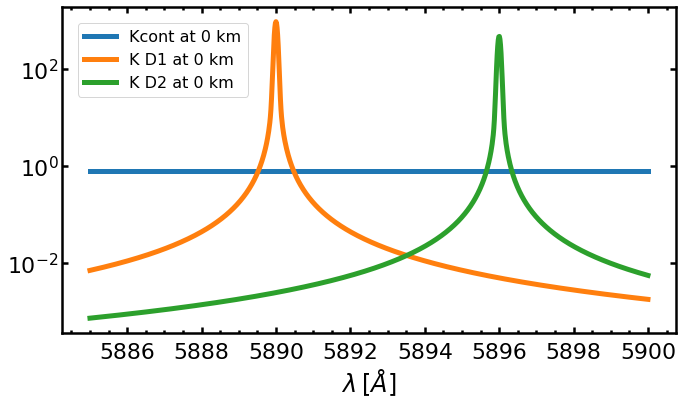

In [190]:
i=48
plt.plot(lams_AA[1:],Kcont[i][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'Kcont at {ValTable[" h"][i]} km')
plt.plot(lams_AA[1:],Kappa_D1[i][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'K D1 at {ValTable[" h"][i]} km')
plt.plot(lams_AA[1:],Kappa_D2[i][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'K D2 at {ValTable[" h"][i]} km')
# plt.ylabel(r'$\tau_\nu$')
plt.xlabel(r'$\lambda \: [\AA]$')
plt.yscale('log')
plt.legend()
plt.show()

1.9331007357396465e-12 9.568744496737684e-13


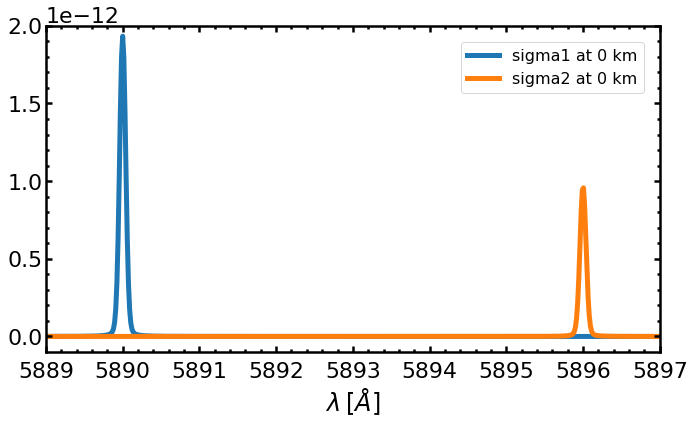

In [191]:
i=48
plt.plot(lams_AA[1:],sigs[i][0][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'sigma1 at {ValTable[" h"][i]} km')
plt.plot(lams_AA[1:],sigs[i][1][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'sigma2 at {ValTable[" h"][i]} km')
# plt.ylabel(r'$\tau_\nu$')
print(max(sigs[i][0][1:]),max(sigs[i][1][1:]))
plt.xlabel(r'$\lambda \: [\AA]$')
plt.ylim(-0.1e-12,2e-12)
plt.xlim(5889,5897)
plt.legend()
plt.show()

[0, 10, 20, 30, 40, 50]


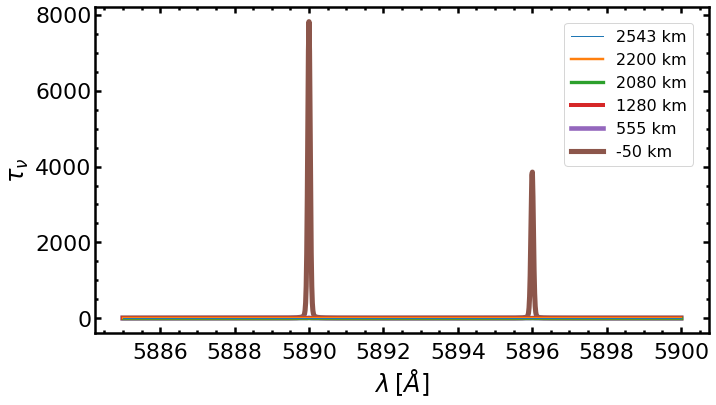

In [192]:
indices=[]
for i in range(0,len(ValTable),10):
    indices.append(i)
    plt.plot(lams_AA[1:],tau_nu[i][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'{ValTable[" h"][i]} km')
print(indices)
plt.ylabel(r'$\tau_\nu$')
plt.xlabel(r'$\lambda \: [\AA]$')
plt.legend()
plt.show()

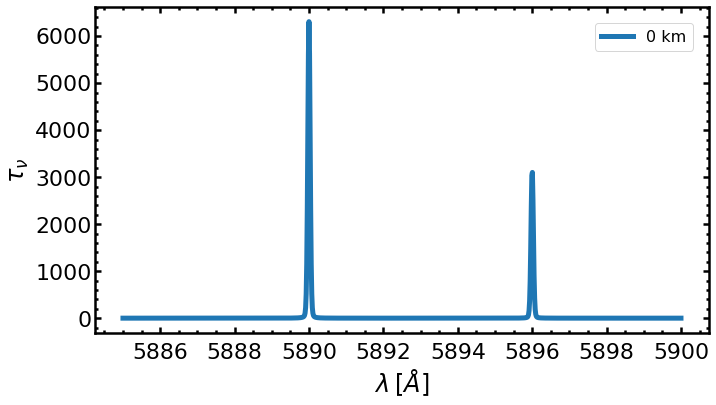

In [193]:
i=48
plt.plot(lams_AA[1:],tau_nu[i][1:],linewidth=np.sqrt(i/2+1),zorder=-i,label=f'{ValTable[" h"][i]} km')
plt.ylabel(r'$\tau_\nu$')
plt.xlabel(r'$\lambda \: [\AA]$')
plt.legend()
plt.show()

In [175]:
print(f'tau_nu\t\ttau_500\t\ttau_589')
for i in range(len(ValTable)):
    print(f'{tau_nu[i][0]:.3e}\t{ValTable["tau_500"][i]:.3e}\t{tau_nu[i][334]:.3e}')

tau_nu		tau_500		tau_589
-0.000e+00	0.000e+00	-0.000e+00
4.149e-08	3.712e-08	4.149e-08
4.412e-08	3.969e-08	4.412e-08
4.948e-08	4.491e-08	4.948e-08
5.415e-08	4.952e-08	5.415e-08
5.698e-08	5.234e-08	5.698e-08
6.125e-08	5.657e-08	6.125e-08
6.594e-08	6.124e-08	6.594e-08
7.587e-08	7.110e-08	7.587e-08
1.080e-07	1.030e-07	1.080e-07
1.483e-07	1.426e-07	1.483e-07
2.044e-07	1.977e-07	2.044e-07
2.496e-07	2.427e-07	2.497e-07
2.632e-07	2.562e-07	2.633e-07
2.710e-07	2.640e-07	2.711e-07
2.744e-07	2.674e-07	2.745e-07
2.824e-07	2.754e-07	2.825e-07
2.870e-07	2.801e-07	2.872e-07
2.944e-07	2.877e-07	2.948e-07
3.304e-07	3.243e-07	3.329e-07
3.566e-07	3.507e-07	3.617e-07
3.829e-07	3.770e-07	3.915e-07
4.358e-07	4.299e-07	4.549e-07
5.270e-07	5.203e-07	5.756e-07
5.982e-07	5.903e-07	6.828e-07
7.846e-07	7.717e-07	1.030e-06
1.249e-06	1.212e-06	2.604e-06
2.030e-06	1.958e-06	1.000e-05
2.515e-06	2.420e-06	1.919e-05
3.427e-06	3.286e-06	5.932e-05
4.279e-06	4.084e-06	1.334e-04
5.359e-06	5.075e-06	3.130e-04
7.138e-06	6.8

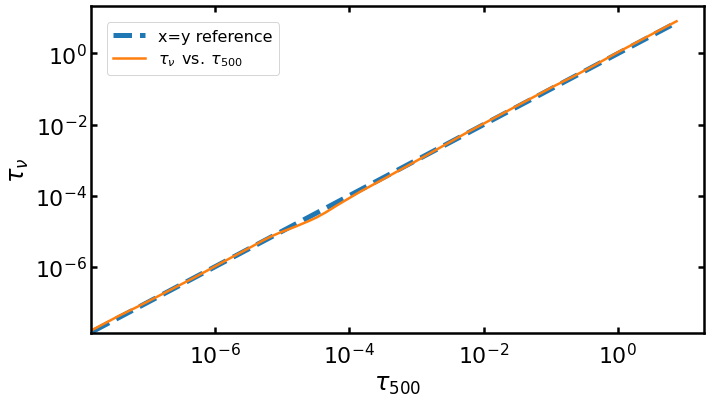

In [194]:
x = ValTable['tau_500']
y = np.transpose(tau_nu)[0]
plt.plot(x,x,linestyle='--',linewidth=5,label='x=y reference')
plt.plot(x,y, label=r'$\tau_\nu \:\: \mathrm{vs.} \: \tau_{500}$')
plt.xlabel(r'$\tau_{500}$')
plt.ylabel(r'$\tau_\nu$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [195]:
from statmospheres import log_integrator
from scipy.special import expn

def Planck(nu,T):
    return 2 * const.h.cgs.value * nu**3 / (const.c.cgs.value)**2 / ((np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T)))-1)

def S_nu(nu,tau,T=None):
    if not T:
        T = np.interp(tau,ValTable['tau_500'],ValTable['T'])
    return Planck(nu,T)

# H_nu(0):
def H_nu0(nu,tau,T=None):
    return 0.5*log_integrator(tau,S_nu(nu,tau,T)*expn(2,tau))

tau_min=-20
tau_max=1.31
density=90000
points = round(density*(tau_max-tau_min))
tau=10**np.linspace(tau_min,tau_max,points)
H_nu0(1e14,tau)

2.896365533237242e-06

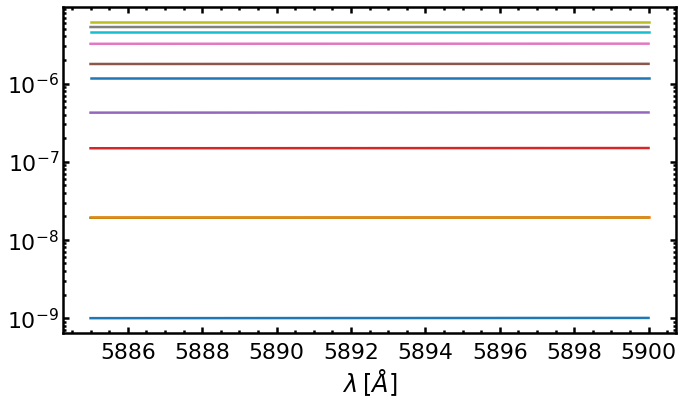

In [62]:
for i in range(40,len(ValTable)):
    Fancy_F = [4*np.pi*H_nu0((const.c/lam).cgs.value,tau_nu[i],ValTable['T'][i]) for lam in lams_AA]
    plt.plot(lams_AA[1:],Fancy_F[1:])
plt.xlabel(r'$\lambda \: [\AA]$')
plt.yscale('log')
plt.show()

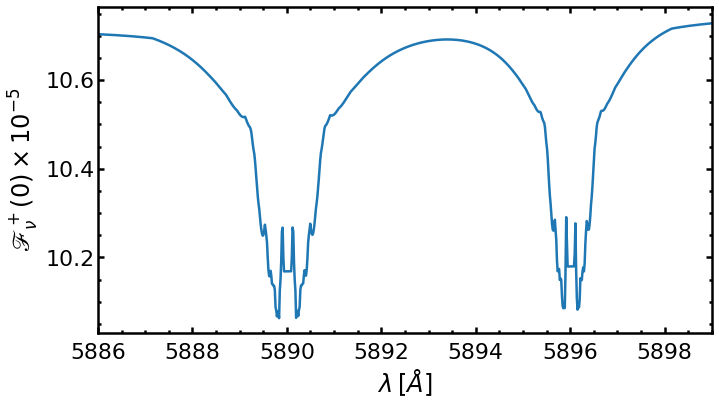

In [196]:
import scipy

# np.shape(np.transpose(tau_nu[1:])[1])
Fancy_F=np.zeros(len(lams_AA[1:]))
tau_nu_T = np.transpose(tau_nu[1:])

for i,lam in enumerate(lams_AA[1:]):
    tau_func = scipy.interpolate.interp1d(ValTable[' h'][1:],np.array(tau_nu)[:,i][1:])
    taus = sorted(list(tau_func(np.linspace(ValTable[' h'][1],340,5000)))+list(tau_func(np.linspace(ValTable[' h'][1],ValTable[' h'][51],50))))
    Fancy_F[i] = 4*np.pi*H_nu0((const.c/lam).cgs.value,taus)
    # print(Fancy_F)
plt.plot(lams_AA[1:],Fancy_F*1e5)
plt.xlabel(r'$\lambda \: [\AA]$')
plt.ylabel(r'$\mathscr{F}^+_\nu (0) \times 10^{-5}$')
# plt.yscale('log')
# plt.xlim(5887,5893)
plt.xlim(5886,5899)
plt.show()

In [167]:
import scipy

i=1
tau_func = scipy.interpolate.interp1d(ValTable[' h'],np.array(tau_nu)[:,i])
sorted(list(tau_func(np.linspace(ValTable[' h'][1],340,5000)))+list(tau_func(np.linspace(ValTable[' h'][1],ValTable[' h'][51],50))))

[4.149078789547541e-08,
 4.149078789547541e-08,
 4.161967697929368e-08,
 4.1748566063111955e-08,
 4.1877455146930234e-08,
 4.2006344230748507e-08,
 4.213523331456678e-08,
 4.226412239838505e-08,
 4.2393011482203325e-08,
 4.252190056602145e-08,
 4.2650789649839725e-08,
 4.2779678733658e-08,
 4.290856781747627e-08,
 4.303745690129454e-08,
 4.3166345985112816e-08,
 4.3295235068931095e-08,
 4.342412415274937e-08,
 4.355301323656764e-08,
 4.368190232038591e-08,
 4.3810791404204186e-08,
 4.393968048802246e-08,
 4.406856957184074e-08,
 4.4243964988479704e-08,
 4.445372387661643e-08,
 4.4663482764753393e-08,
 4.487324165289036e-08,
 4.508300054102732e-08,
 4.5292759429164284e-08,
 4.550251831730125e-08,
 4.571227720543821e-08,
 4.5922036093575175e-08,
 4.613179498171214e-08,
 4.63415538698491e-08,
 4.6551312757986066e-08,
 4.676107164612303e-08,
 4.697083053425999e-08,
 4.7180589422396956e-08,
 4.7390348310533675e-08,
 4.760010719867064e-08,
 4.78098660868076e-08,
 4.8019624974944566e-08,
 4.8

In [166]:
tau_func(345)

array(0.00874357)